# Time Series and Forecasting	Assignment

### Course:	Time Series	and	forecasting	methods
#### Program: MSc in Data Science (part-time)


* Student: **Perakis Georgios**
* Code: **DS3616014**
* Contact: **gperakis[at]aueb.gr**

## Description

The data you will have to analyze are in the eclass in the **excel data-assignment.xls**
file. The **dependent variables** for which you will construct the models you are asked
for, are the **returns** of four investment vechicles **(Y1, Y2, Y3, Y4)** for the period **1/1991 - 12/2005**.

The **independent variables** you will use in the models refer to **monthly** values/returns for the variables:
* x1 = RUS-Rf
* x2 = RUS (-1) -Rf (-1) lagged Russel index
* x3 = MXUS-Rf
* x4 = MEM- Rf
* x5 = SMB
* x6 = HML
* x7 = MOM
* x8 = SBGC-Rf
* x9 = SBWG-Rf
* x10 = LHY-Rf
* x11 = DEFSPR
* x12 = FRSI-Rf
* x13 = GSCI-Rf
* x14 = VIX

for the period **1/1991 - 12/2005**.

Analyze dependent variables based on data for the period 1/1991 - 12/2004 **[You will not use the data for the period 1/2005 - 12/2005]**:

1. Construct an appropriate **time series** model (AR, MA, ARMA).
2. Develop an appropriate **regression** model
  * In case of **autocorrelation** problem of **regression residuals**, correct the autocorrelation problem (using time series AR, MA, ARMA models).
  * In case of **heteroscedasticity** problem of **regression residuals**, correct the
    heteroskedasticity problem (using time-varying ARCH, GARCH models).
3. Write the models you have found at questions (1) - (2). Assess the **goodness of fit** of these models based on the **AIC and BIC** information criteria.
4. Based on the estimated models of questions (1) - (2), **construct forecasts** of the analyzed series for the period **1/2005 - 12/2005**, and **evaluate the forecasts** you have found by using two evaluation criteria:
  * the mean square prediction error
  * the Hit ratio (indicates the percentage of predictions that correctly evaluate the sign of the actual value of the dependent variable.)
  
Each student will have to analyze **two only dependent variables**

### Load Libraries

In [2]:
# loads the library urca, which contains the command ur.df() 
# and applies Unit-Root Testing based on Dickey-Fuller test 
library(urca)
library(tseries)

In [3]:
# Importing data into R can be carried out in various ways. Below, the command read.table is used:
data_all = read.table('/home/george/Desktop/AUEB/Time Series Analysis/time_series_in_r/Data-Assignment-Feb-2018.txt')

In [4]:
head(data_all)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
0.02058,0.02058,0.00468,0.01468,0.04568,0.01745,0.02313,0.07273,0.0389,-0.0181,-0.0946,0.00575,0.01937,0.01868,0.0001,0.00004,-0.10389,-0.0547
0.03503,0.02583,0.03903,0.03623,0.06346,0.04568,0.09344,0.13201,0.0397,-0.0056,-0.1147,0.00144,-0.00486,0.10639,-0.0014,-0.01039,0.00866,0.0032
0.04458,0.02168,0.02878,0.06348,0.02225,0.06346,-0.06591,0.03187,0.0395,-0.0124,-0.0407,0.00253,-0.04193,0.02621,-0.0024,0.03228,0.03201,-0.0435
0.00865,0.01325,0.02585,0.04855,-0.00581,0.02225,0.00371,-0.00174,0.0037,0.0170,-0.0224,0.00790,0.01053,0.01619,-0.0008,0.01107,0.01764,0.0136
0.01507,0.00227,0.02377,0.00887,0.03258,-0.00581,0.00577,0.06795,-0.0037,-0.0052,0.0282,-0.00023,-0.00601,-0.00780,-0.0011,0.00235,-0.00524,-0.0231
-0.00064,-0.00924,-0.00234,0.01246,-0.05360,0.03258,-0.07982,-0.04322,0.0006,0.0102,0.0010,-0.00499,-0.01526,0.01826,-0.0011,0.01085,-0.02869,0.0362


### Question 1 

In [5]:
y2 <- data_all$V2

###### Let create a time series object using the function “ts” from a vector - single time-series or a matrix - multivariate time-series. The data consist of the Y2 monthly returns from 1/1991 - 12/2004, 

In [6]:
j2 = ts(y2, frequency=12, start = c(1991, 1), end = c(2004, 12))
j2

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1991  0.02058  0.02583  0.02168  0.01325  0.00227 -0.00924  0.00966  0.00053
1992  0.05392  0.02265 -0.01136  0.01804  0.01633  0.02156  0.01779  0.00341
1993  0.02083  0.00650  0.03433  0.02154  0.02199  0.01372  0.01501  0.01853
1994  0.02228  0.00153  0.00033 -0.00750 -0.00497 -0.00133  0.00716 -0.00250
1995  0.00780  0.00595  0.00140  0.01080  0.00274  0.01248  0.00715  0.00886
1996  0.01039  0.01013  0.00721  0.01611  0.01309  0.00560 -0.01023  0.01089
1997  0.00951  0.00655 -0.01105  0.00863  0.01418  0.01499  0.01133  0.00994
1998  0.01548  0.00946  0.01140  0.01515 -0.00118 -0.00265 -0.00933 -0.06208
1999  0.02238 -0.00282  0.00195  0.02421  0.00782  0.00972  0.00434  0.00385
2000  0.01347  0.00787  0.01310  0.00926  0.00210  0.01691  0.00413  0.01065
2001  0.01624  0.00647 -0.00098  0.00436  0.00634 -0.00532  0.00405  0.00569
2002  0.00883 -0.00108  0.00481  0.00444  0.00066 -0.00329 -0.00340  0.00543

### Note:
Since we are talking about **returns** we **don't** need to take to logs and the differences of the logs

### Methodology

In order to work we will use the **Box-Jenkins methodology** that constists of the following steps:
* **Identification step**
  * Use autocorrelation and partial autocorrelation of the series to find out appropriate values of p and q
* **Estimation step**
  * Estimate the models parameters using Maximum Likelihood method and least squares method
* **Diagnostic checking step**
  * Examine if the chosen (estimated) model fits the data reasonable well - test if the residuals of the estimated model are uncorrelated, homoscedastic and normal, i.e. white noise
* **Forecasting step**
  * Compute forecasts based on the fitted model

### The time series plot and the histogram for the Y3 data is given by

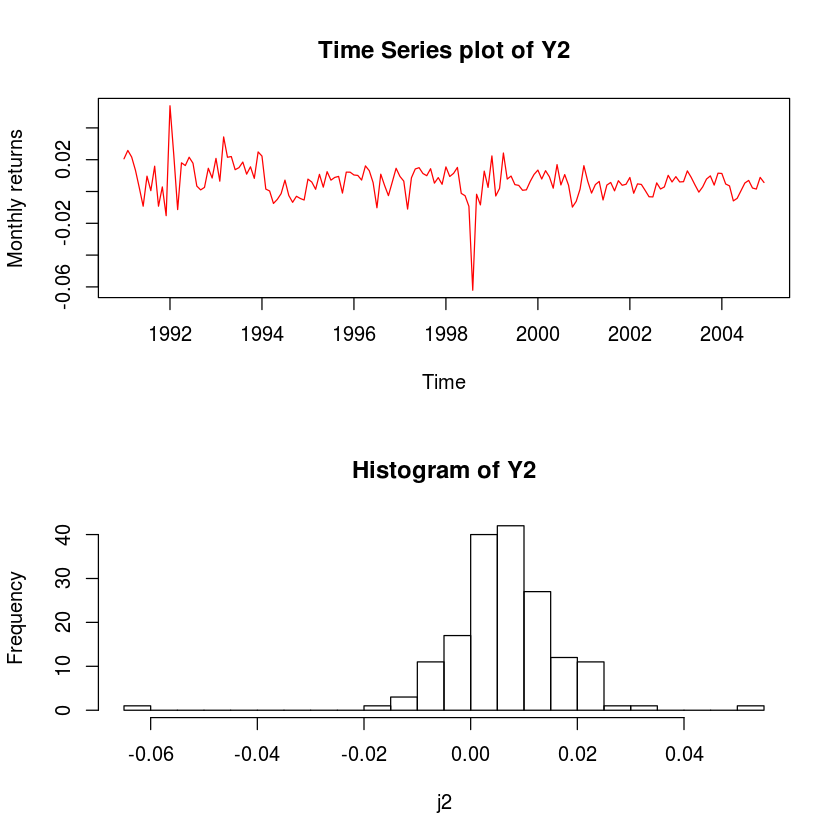

In [8]:
# set up the graphics
par(mfrow=c(2, 1))      
plot(j2, type="l", col='red', lwd=1, main="Time Series plot of Y2", ylab="Monthly returns")
hist(j2, nclass=20, main="Histogram of Y2")

### Note:
The **autocorrelation** and **partial autocorrelation** plots are useful to examine if there is **dependence between lagged values **of the analyzed series

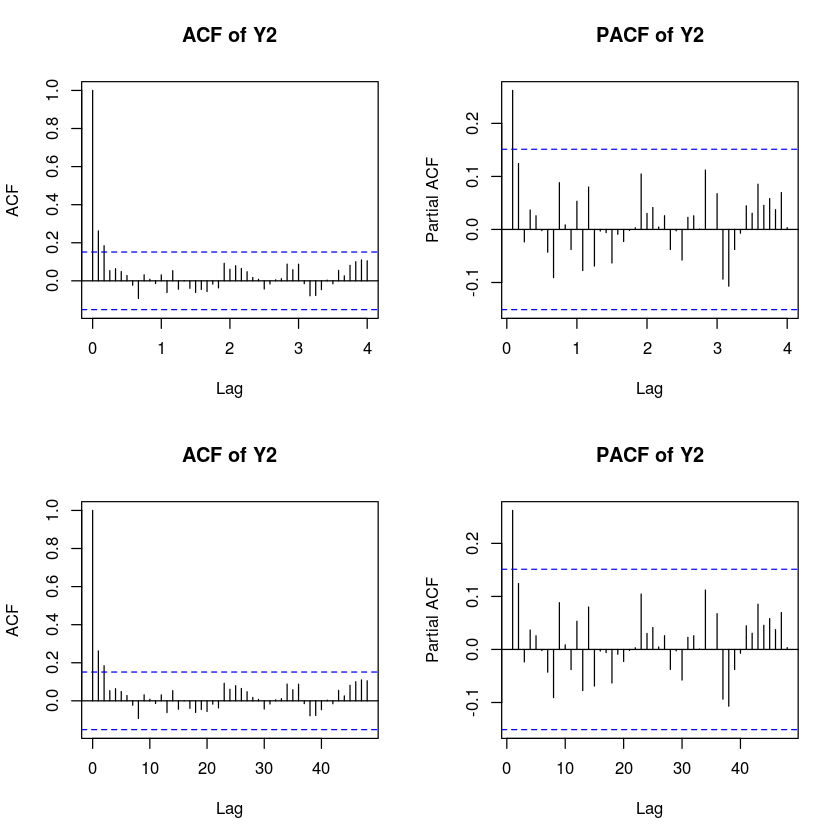

In [9]:
# Create Autocorrelation and partial autocorrelation plots
par(mfrow=c(2, 2)) # set up the graphics  
acf(j2, 48, main="ACF of Y2") # autocorrelation function plot 
pacf(j2, 48, main="PACF of Y2") # partial autocorrelation function 
acf(ts(j2, freq=1), 48, main="ACF of Y2")        # autocorrelation function plot 
pacf(ts(j2, freq=1), 48, main="PACF of Y2") 

### Note

We must note that in the autocorrelation plots presented above, the **dashed lines** are the approximate **two standard error confidence bounds** computed by ± 1,96* (1 / T), where T is the number observations.

If the autocorrelation is **within these bounds**, it is **not** significantly different from zero at (approximately) **5% level of significance**.

So we conclude  that:

* From **ACF plot** we observe that we have **autocorrelation for lag=1 and lag=2**. We must check a ** 2 lag moving average** model **(MA(2))**
* From **PACF plot** we observe that we also have **partial autocorrelation for lag=1**. We must check an ** 1 lag autoregressive** model **(AR(1))**

We focus on the stationary time series, i.e. the monthly returns.
We can:
* **test for normality of Y1**
* **create the plot of the histogram together with a density plot**
* **also create the normal QQplot**


	Shapiro-Wilk normality test

data:  j2
W = 0.88127, p-value = 2.648e-10


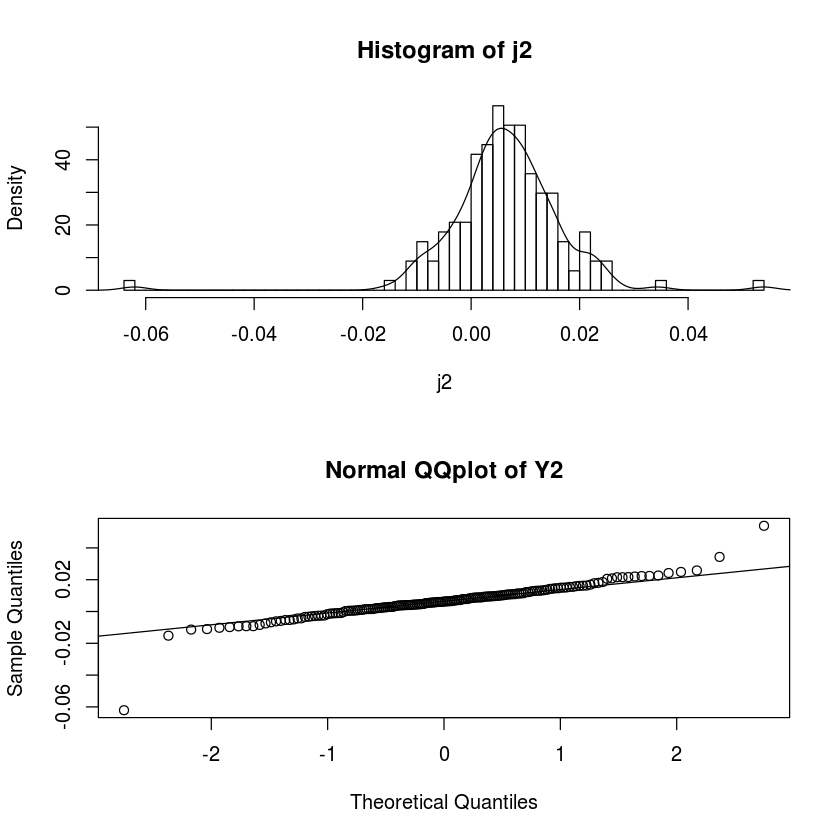

In [15]:
# Shapiro test of normality
shapiro.test(j2)

par(mfrow=c(2,1))
hist(j2, prob=TRUE, 50) # histogram

lines(density(j2))
# smooth it - ?density for details
qqnorm(j2, main="Normal QQplot of Y2") # normal Q-Q plot
qqline(j2) # add a line

#### Conclusions:
* From Shapiro Wilk test (p-value = 2.648e-10) we **reject** the Null hypothesis of Normality.'
* From the Histogram we see a left skewness.
* From the QQplot we see several points off the qqline.

So we conclude that we **don't have Normality**

### Estimation of ARMA models -  UNIT ROOT TESTING

### Autoregressive Models (AR(p))

First, we can fit an **autoregressive time series model** to the Y1 data, by selecting the complexity of the
model **based on AIC**. Then, we perform an **augmented Dickey-Fuller test** of unit root, based on a model
with constant and trend 

In [17]:
# Unit root testing for the Y1 series
# Fits an autoregressive model, and selects the best AR order based on AIC
m2 = ar(j2)
m2
paste('Order:', m2$order)


Call:
ar(x = j2)

Coefficients:
     1       2  
0.2296  0.1243  

Order selected 2  sigma^2 estimated as  0.0001043

[1] "Order: 2"

### Checking autoregressive model without drift and without trend

In [19]:
m21 <- ur.df(j2, type='none', lags=m2$order-1)
m21
summary(m21)


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -5.4669 



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.058347 -0.001957  0.002613  0.007711  0.058248 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.42578    0.07788  -5.467 1.68e-07 ***
z.diff.lag -0.24318    0.07465  -3.257  0.00137 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01061 on 164 degrees of freedom
Multiple R-squared:  0.3281,	Adjusted R-squared:  0.3199 
F-statistic: 40.05 on 2 and 164 DF,  p-value: 6.87e-15


Value of test-statistic is: -5.4669 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


* The Critical Value (CV) for 5% is -1.95
* The value of the test statistic for lag=1 without drift and without trend is: -5.4669
* z.lag.1 and z.diff.lag are statistically significant

Obviously, the null hypothesis of non-stationarity for the Y1 series is rejected. Therefore the returns of Y1 seem to be a stationary process.

### Checking autoregressive model with drift (intercept) and without trend

In [21]:
# Unit root testing for the Y1 series
# Fits an autoregressive model, and selects the best AR order based on AIC
m22 <- ur.df(j2, type="drift", lags=m2$order-1)
m22
summary(m22)


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -7.0302 24.731 



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.063758 -0.004284 -0.000036  0.005364  0.052803 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0040331  0.0009866   4.088 6.82e-05 ***
z.lag.1     -0.6560520  0.0933188  -7.030 5.37e-11 ***
z.diff.lag  -0.1277698  0.0766979  -1.666   0.0977 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01013 on 163 degrees of freedom
Multiple R-squared:  0.3906,	Adjusted R-squared:  0.3831 
F-statistic: 52.23 on 2 and 163 DF,  p-value: < 2.2e-16


Value of test-statistic is: -7.0302 24.731 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


* The Critical Value (CV) for 5% is -2.88
* The value of the test statistic for lag=1 with drift is: -7.0302
* Both Intercept and z.lag.1 are statistically significant
* z.diff.lag is not statistically significant

Obviously, the null hypothesis of non-stationarity for the Y1 series is rejected. Therefore the returns of Y1 seem to be a stationary process.

### Checking autoregressive model with Drift (intercept) and Trend

In [22]:
m23 <- ur.df(j2, type="trend", lags=m2$order-1)
m23
summary(m23)


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -7.2329 17.4929 26.2202 



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.064083 -0.004363  0.000646  0.005553  0.050346 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.583e-03  1.875e-03   3.510  0.00058 ***
z.lag.1     -6.972e-01  9.640e-02  -7.233 1.78e-11 ***
tt          -2.706e-05  1.696e-05  -1.596  0.11243    
z.diff.lag  -1.060e-01  7.755e-02  -1.366  0.17374    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01009 on 162 degrees of freedom
Multiple R-squared:    0.4,	Adjusted R-squared:  0.3889 
F-statistic:    36 on 3 and 162 DF,  p-value: < 2.2e-16


Value of test-statistic is: -7.2329 17.4929 26.2202 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -

* The Critical Value (CV) for 5% is -3.43
* The value of the test statistic for lag=1 with drift is: -7.2329
* Both Intercept and z.lag.1 are statistically significant
* Trend and z.diff.lag are **not** significant.

Obviously, the null hypothesis of non-stationarity for the Y1 series is rejected. Therefore the returns of Y1 seem to be a stationary process.

**Thus the model does not have a trend!**

#### Now we will check the autoregressive of lag=1 model (AR(1))

In [25]:
ar1fit <- arima(j2, order=c(1,0,0))
ar1fit


Call:
arima(x = j2, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.2634     0.0065
s.e.  0.0746     0.0011

sigma^2 estimated as 0.000104:  log likelihood = 531.99,  aic = -1057.97

### The estimated model (AR(1) can be written in the form:

$$y_{t} = μ*(1-φ_{1}) + φ_{1} * y_{t-1} + e_{t}$$

$$or$$ 

$$y_{t} = 0.0065*(1- 0.2634) + 0.2634 * y_{t-1} + e_{t}$$

$$or$$ 

$$y_{t} = 0.0047879 + 0.2473 * y_{t-1} + e_{t}$$


### Moving Average Models MA(q)

#### We check the moving average of lag=2 model (MA(2))

Note: 
This model is not restricted

In [32]:
ma2fit <- arima(j2, order=c(0, 0, 2))
ma2fit


Call:
arima(x = j2, order = c(0, 0, 2))

Coefficients:
         ma1     ma2  intercept
      0.2311  0.1724     0.0065
s.e.  0.0758  0.0739     0.0011

sigma^2 estimated as 0.0001025:  log likelihood = 533.18,  aic = -1058.36

**The estimated model MA(2) can be written in the form:**

$$y_{t} - 0.0065 = 0.2311* e_{t-1} + 0.1724* e_{t-2} + e_{t}$$

$$or$$ 

$$y_{t} = 0.0065 + 0.2311* e_{t-1} + 0.1724* e_{t-2} + e_{t}$$


### Lets now fit an ARMA(1, 2) model. The command is:

In [31]:
arma12fit <- arima(j2, order=c(1, 0, 2))
arma12fit


Call:
arima(x = j2, order = c(1, 0, 2))

Coefficients:
         ar1      ma1     ma2  intercept
      0.3539  -0.1185  0.0942     0.0065
s.e.  0.8266   0.8343  0.2301     0.0012

sigma^2 estimated as 0.0001023:  log likelihood = 533.3,  aic = -1056.61

#### The estimated ARMA(1, 2) model can be written in the form:


$$y_{t} - μ = φ_{1}*(y_{t-1} -μ) + θ_{1} * e_{t-1} + θ_{2} * e_{t-2} + e_{t}$$

$$or$$ 

$$y_{t} =μ +  φ_{1}*(y_{t-1} -μ) + θ_{1} * e_{t-1} + θ_{2} * e_{t-2} + e_{t}$$

$$or$$ 

$$y_{t} = 0.0065 +  0.3539*(y_{t-1} -0.0065) - 0.1185 * e_{t-1} + 0.0942 * e_{t-2} + e_{t}$$


Summarizing we have the following:
* AR(1): 
  * Variance: **0.0001040**
  * AIC: **-1057.97**
* MA(2):
  * Variance: **0.0001025**
  * AIC: **-1058.36**
* ARMA(1, 2)
  * Variance: **0.0001023**
  * AIC: **-1056.61**

  
### Conclusion:

* The model with the lowest variance and lower AIC score is the best. 
* Here, **MA(2)** has the smallest AIC with the second smallest variance. Thus, it's the model that best fits the data.

### Diagnostic plots

Now we will provide some **diagnostic plots** for the **residuals** of the best model (MA(2)).
Based on the residuals of the restricted MA(2) model, we will present the:
* autocorrelation **(acf)** plots and the partial autocorrelation **(pacf)** plots of the **estimated residuals**
* the autocorrelation plots and the partial autocorrelation plots of the **squared** residuals (check **heteroskedasticity**)
* normality plots (examine the assumption of **normality of residuals**).

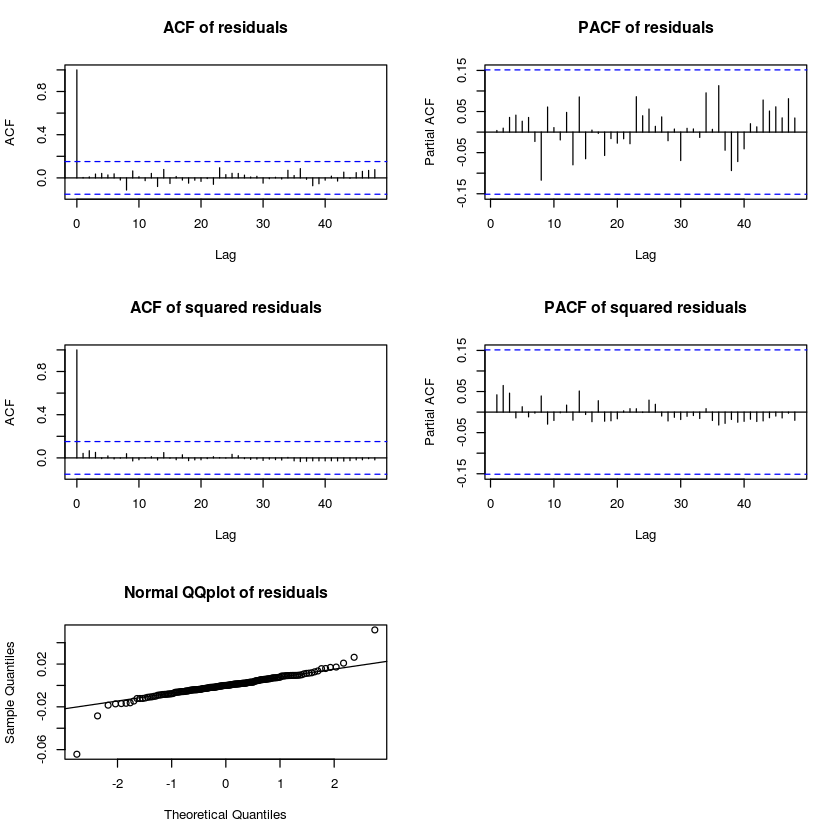

In [33]:
ma2residualsTS <- ts(ma2fit$residuals, frequency=12, start = c(1991, 1), end = c(2004, 12))

par(mfrow=c(3,2))

# set up the graphics
acf(ts(ma2residualsTS,freq=1), 48, main="ACF of residuals")
pacf(ts(ma2residualsTS,freq=1), 48, main="PACF of residuals")
acf(ts(ma2residualsTS^2,freq=1), 48, main="ACF of squared residuals")
pacf(ts(ma2residualsTS^2,freq=1), 48, main="PACF of squared residuals")
qqnorm(ma2residualsTS,main="Normal QQplot of residuals")
qqline(ma2residualsTS)

Based on the residual plots presented above:

* From the ACF and PACF of the residuals, it seems that the assumptions with respect to them are satisfied
* From the PACF fo the squared residuals it seems that there we have homoskedasticity
* From the Normal  QQPlot of residuals we see that we may have normality issues for the residuals of the MA(2) model.